# **Project 5 - Image Classification with CNNs**

This project involves designing, learning, evaluating and finally fine-tuning a Convolutioal
Neural Network model to be able to classify the images in CIFAR-10 dataset.

In [ ]:
#find GPU Address



from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']


print(get_available_gpus())

['/device:GPU:0']


Load The dataset, train, and visualize


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
391/391 [==============================] - 14s 14ms/step - loss: 3.0139 - accuracy: 0.2548 - val_loss: 1.7245 - val_accuracy: 0.3707
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.6573 - accuracy: 0.3995 - val_loss: 1.6024 - val_accuracy: 0.4281
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 1.5118 - accuracy: 0.4611 - val_loss: 1.6222 - val_accuracy: 0.4520
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 1.4005 - accuracy: 0.5074 - val_loss: 1.3631 - val_accuracy: 0.5221
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.3107 - accuracy: 0.5411 - val_loss: 1.3584 - val_accuracy: 0.5299
Epoch 6/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2369 - accuracy: 0.5711 - val_loss: 1.2604 - val_accuracy: 0.5661
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1

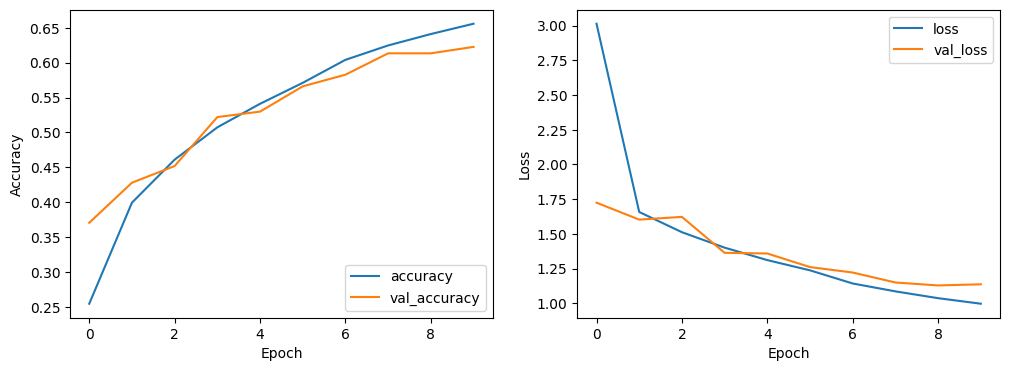

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2, ResNet50
import matplotlib.pyplot as plt

with tf.device('/gpu:0'):
  # Step 1: Load the CIFAR-10 dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  # Convert class vectors to binary class matrices
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  # Step 2: Design the model
  inputs = layers.Input(shape=(32, 32, 3))
  x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)

  # Step 3: Set loss function and optimizer
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Step 4: Train the model
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

  # Step 5: Visualize the results

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')

  plt.show()


In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB2, ResNet50

# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
BATCH_SIZE = 64



In [ ]:
dataset_name = "cifar10"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train", "test"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteRU7M4K/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteRU7M4K/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

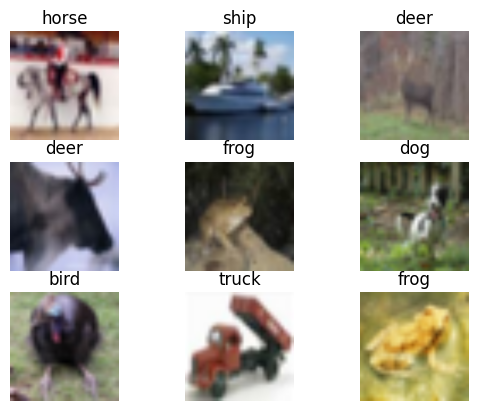

In [ ]:
def format_label(label):
    string_label = label_info.int2str(label)
    return string_label


label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

In [ ]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]


def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

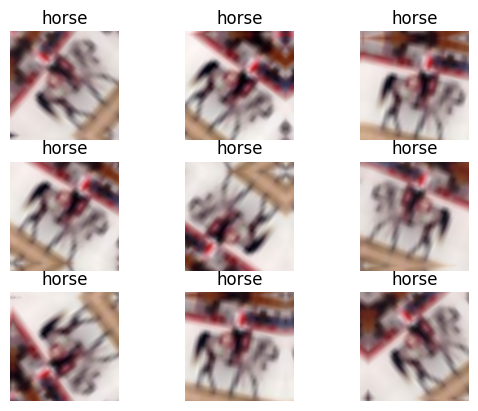

In [ ]:
for image, label in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [ ]:
# One-hot / categorical encoding
def input_preprocess_train(image, label):
    image = img_augmentation(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# preprocess images
def input_preprocess_test(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(input_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size=BATCH_SIZE, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size=BATCH_SIZE, drop_remainder=True)

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()




In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB2(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile model
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

31790344/31790344 [==============================] - 0s 0us/step
Epoch 1/8
781/781 [==============================] - 567s 711ms/step - loss: 1.3115 - accuracy: 0.6442 - val_loss: 0.4257 - val_accuracy: 0.8547
Epoch 2/8
781/781 [==============================] - 514s 658ms/step - loss: 0.9148 - accuracy: 0.6886 - val_loss: 0.4452 - val_accuracy: 0.8556
Epoch 3/8
781/781 [==============================] - 502s 643ms/step - loss: 0.9152 - accuracy: 0.6878 - val_loss: 0.4274 - val_accuracy: 0.8570
Epoch 4/8
781/781 [==============================] - 500s 640ms/step - loss: 0.9205 - accuracy: 0.6874 - val_loss: 0.4260 - val_accuracy: 0.8582
Epoch 5/8
781/781 [==============================] - 501s 642ms/step - loss: 0.9352 - accuracy: 0.6810 - val_loss: 0.4528 - val_accuracy: 0.8473
Epoch 6/8
781/781 [==============================] - 502s 643ms/step - loss: 0.9407 - accuracy: 0.6791 - val_loss: 0.4115 - val_accuracy: 0.8612
Epoch 7/8
781/781 [==============================] - 499s 639ms/s

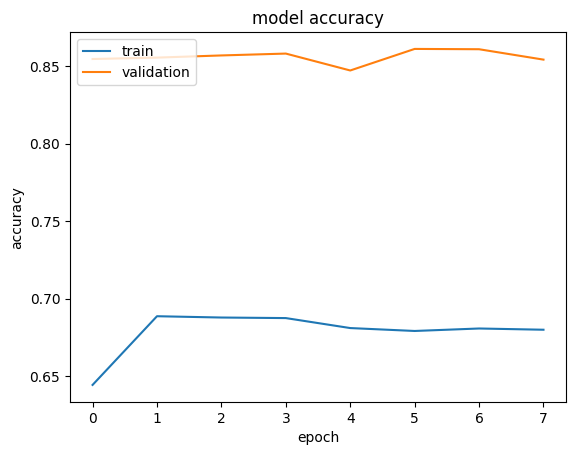

In [ ]:
with tf.device('/gpu:0'):

  model = build_model(num_classes=NUM_CLASSES)

  epochs = 8  # @param {type: "slider", min:8, max:20}
  hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test)
  plot_hist(hist)

In [ ]:
model.save('/content/drive/MyDrive/COMPUTER VISION')

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def build_model_resnet50(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = ResNet50(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile model
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/8
781/781 [==============================] - 539s 681ms/step - loss: 1.7666 - accuracy: 0.5739 - val_loss: 0.8332 - val_accuracy: 0.7400
Epoch 2/8
781/781 [==============================] - 547s 700ms/step - loss: 1.0854 - accuracy: 0.6297 - val_loss: 0.6949 - val_accuracy: 0.7581
Epoch 3/8
781/781 [==============================] - 545s 698ms/step - loss: 1.0702 - accuracy: 0.6305 - val_loss: 0.6885 - val_accuracy: 0.7573
Epoch 4/8
781/781 [==============================] - 532s 681ms/step - loss: 1.0828 - accuracy: 0.6287 - val_loss: 0.7720 - val_accuracy: 0.7374
Epoch 5/8
781/781 [==============================] - 538s 689ms/step - loss: 1.0996 - accuracy: 0.6228 - val_loss: 0.7080 - val_accuracy: 0.7525
Epoch 6/8
781/781 [==============================] - 546s 699ms/step - loss: 1.1049 - accuracy: 0.6213 - val_loss: 0.7388 - val_accuracy: 0.7481
Epoch 7/8
781/781 [==============================] - 570s 730ms/s

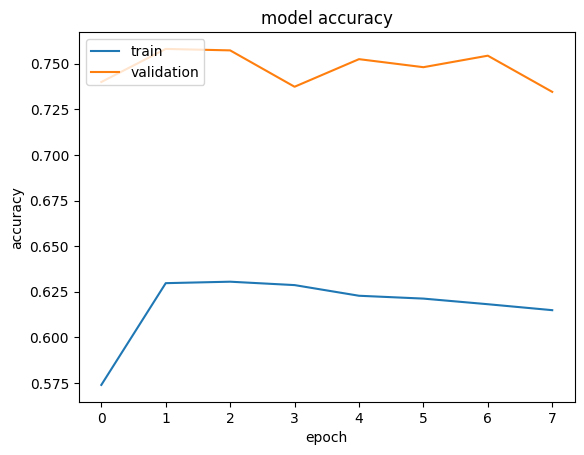

In [ ]:
with tf.device('/gpu:0'):

  model = build_model_resnet50(num_classes=NUM_CLASSES)

  epochs = 8  # @param {type: "slider", min:8, max:20}
  hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test)
  plot_hist(hist)

In [ ]:
model.save('/content/drive/MyDrive/COMPUTER VISION/model_resnet50')

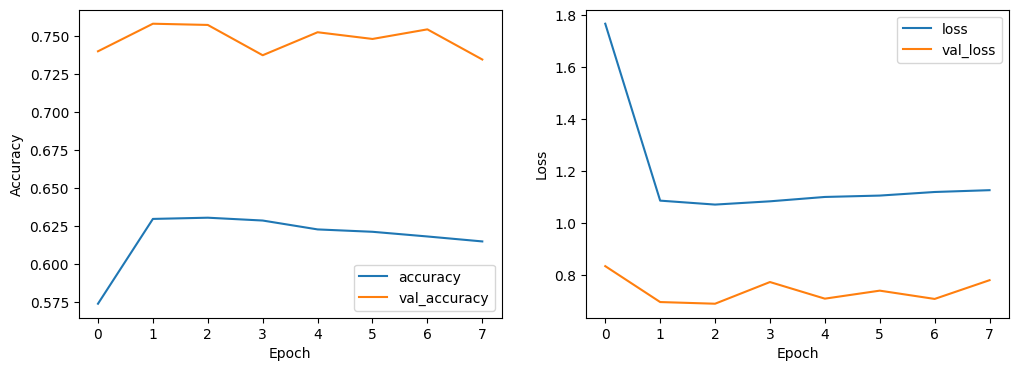

In [ ]:


#show plots
history = hist
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()